https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
train = unpickle("train")
test = unpickle("test")
meta = unpickle("meta")

In [3]:
train.keys()
# test は trainと同じ

dict_keys([b'coarse_labels', b'batch_label', b'filenames', b'data', b'fine_labels'])

In [4]:
meta.keys()

dict_keys([b'fine_label_names', b'coarse_label_names'])

In [5]:
meta[b'coarse_label_names']

[b'aquatic_mammals',
 b'fish',
 b'flowers',
 b'food_containers',
 b'fruit_and_vegetables',
 b'household_electrical_devices',
 b'household_furniture',
 b'insects',
 b'large_carnivores',
 b'large_man-made_outdoor_things',
 b'large_natural_outdoor_scenes',
 b'large_omnivores_and_herbivores',
 b'medium_mammals',
 b'non-insect_invertebrates',
 b'people',
 b'reptiles',
 b'small_mammals',
 b'trees',
 b'vehicles_1',
 b'vehicles_2']

In [6]:
meta[b'fine_label_names'][:10]

[b'apple',
 b'aquarium_fish',
 b'baby',
 b'bear',
 b'beaver',
 b'bed',
 b'bee',
 b'beetle',
 b'bicycle',
 b'bottle']

In [7]:
import PIL.Image
import numpy as np
def blob2img(blob):
    return PIL.Image.fromarray(np.dstack(blob))
    
def getimage(data,i):
    return blob2img(data[b'data'][i].reshape((3,32,32)))
    

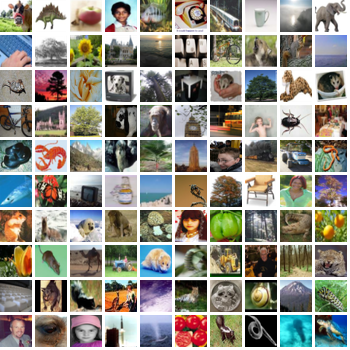

In [8]:
canvas = PIL.Image.new('RGB',(350,350),(255,255,255))
for i in range(10):
    for j in range(10):
        canvas.paste(getimage(train,i*10+j),(35*j,35*i))
canvas

In [9]:
# Google 翻訳サービスを使う
import requests
import re
 
url = 'https://translate.google.com/?hl=ja#en/ja/'
 
def translate(estring):
    r = requests.get(url, params={'q': estring})
 
    pattern = "TRANSLATED_TEXT=\'(.*?)\'"
    jstring = re.search(pattern, r.text).group(1)
 
    return jstring

In [10]:
import csv
i = 0
jlabels = []
for l in meta[b'coarse_label_names']:
    l = l.decode('utf-8')
    jlabel=translate(l.replace('_',' '))
    print(i,l,jlabel)
    jlabels.append({'en':l,'ja':jlabel})
    i +=1
    
paramnames = ['en','ja']
header = dict([(val,val)for val in paramnames])
with open("pre_coarse_label_names.txt", mode='w',encoding='utf-8',newline='') as f:
    jlabels.insert(0,header) # 1行目
    # writer = csv.DictWriter(f, paramnames, extrasaction='ignore')
    writer = csv.DictWriter(f, paramnames)
    writer.writerows(jlabels)

0 aquatic_mammals 水生哺乳類
1 fish 魚
2 flowers フラワーズ
3 food_containers 食品容器
4 fruit_and_vegetables 果物と野菜
5 household_electrical_devices 家電製品
6 household_furniture 家具
7 insects 昆虫
8 large_carnivores 大きな肉食動物
9 large_man-made_outdoor_things 大きな人工屋外のもの
10 large_natural_outdoor_scenes 大きな自然の屋外シーン
11 large_omnivores_and_herbivores 大きな雑食動物および草食動物
12 medium_mammals 中型哺乳類
13 non-insect_invertebrates 非昆虫無脊椎動物
14 people 人
15 reptiles 爬虫類
16 small_mammals 小さな哺乳類
17 trees 木
18 vehicles_1 車両1
19 vehicles_2 車両2


In [11]:
i = 0
jlabels = []
for l in meta[b'fine_label_names']:
    l = l.decode('utf-8')
    jlabel=translate(l.replace('_',' '))
    # print(i,l,jlabel)
    jlabels.append({'en':l,'ja':jlabel})
    i +=1
    
paramnames = ['en','ja']
header = dict([(val,val)for val in paramnames])
with open("pre_fine_label_names.txt", mode='w',encoding='utf-8',newline='') as f:
    jlabels.insert(0,header) # 1行目
    # writer = csv.DictWriter(f, paramnames, extrasaction='ignore')
    writer = csv.DictWriter(f, paramnames)
    writer.writerows(jlabels)

# 手作業での翻訳
誤訳が多いので手作業で誤訳をチェックして手作業で修正した

In [12]:
import pandas as pd
clabels = pd.read_csv("EJcoarse_label_names.txt", header=0)
clabels

,en,ja
0,aquatic_mammals,水生哺乳類
1,fish,魚
2,flowers,花
3,food_containers,食器
4,fruit_and_vegetables,果物と野菜
5,household_electrical_devices,家電製品
6,household_furniture,家具
7,insects,昆虫
8,large_carnivores,大型肉食動物
9,large_man-made_outdoor_things,屋外の大型人工物


In [13]:
flabels = pd.read_csv("EJfine_label_names.txt", header=0)
flabels

,en,ja
0,apple,林檎
1,aquarium_fish,水族館の魚
2,baby,赤ちゃん
3,bear,くま
4,beaver,ビーバー
5,bed,ベッド
6,bee,蜂
7,beetle,甲虫
8,bicycle,自転車
9,bottle,ボトル


### EJcoarse_label_names.txt
```
en,ja
aquatic_mammals,水生哺乳類
fish,魚
flowers,花
food_containers,食器
fruit_and_vegetables,果物と野菜
household_electrical_devices,家電製品
household_furniture,家具
insects,昆虫
large_carnivores,大型肉食動物
large_man-made_outdoor_things,屋外の大型人工物
large_natural_outdoor_scenes,屋外の自然シーン
large_omnivores_and_herbivores,草食または雑食の動物
medium_mammals,中型哺乳類
non-insect_invertebrates,無脊椎動物（昆虫は除く）
people,人
reptiles,爬虫類
small_mammals,小型哺乳類
trees,木
vehicles_1,車両タイプ1
vehicles_2,車両タイプ2
```

### EJfine_label_names.txt
```
en,ja
apple,林檎
aquarium_fish,水族館の魚
baby,赤ちゃん
bear,くま
beaver,ビーバー
bed,ベッド
bee,蜂
beetle,甲虫
bicycle,自転車
bottle,ボトル
bowl,ボウル
boy,男の子
bridge,ブリッジ
bus,バス
butterfly,バタフライ
camel,キャメル
can,缶
castle,城
caterpillar,いも虫
cattle,牛
chair,椅子
chimpanzee,チンパンジー
clock,時計
cloud,雲
cockroach,ゴキブリ
couch,ソファー
crab,カニ
crocodile,クロコダイル
cup,カップ
dinosaur,恐竜
dolphin,イルカ
elephant,象
flatfish,ヒラメ
forest,森林
fox,狐
girl,女の子
hamster,ハムスター
house,家
kangaroo,カンガルー
keyboard,キーボード
lamp,ランプ
lawn_mower,芝刈り機
leopard,ヒョウ
lion,ライオン
lizard,トカゲ
lobster,ロブスター
man,男性
maple_tree,カエデ
motorcycle,オートバイ
mountain,山
mouse,マウス
mushroom,キノコ
oak_tree,樫の木
orange,オレンジ
orchid,蘭
otter,カワウソ
palm_tree,ヤシの木
pear,梨
pickup_truck,ピックアップトラック
pine_tree,松
plain,平原
plate,プレート
poppy,ポピー
porcupine,ヤマアラシ
possum,フクロネズミ
rabbit,ウサギ
raccoon,ラクーン
ray,エイ
road,道路
rocket,ロケット
rose,ローズ
sea,海
seal,シール
shark,サメ
shrew,トガリネズミ
skunk,スカンク
skyscraper,超高層ビル
snail,カタツムリ
snake,ヘビ
spider,クモ
squirrel,リス
streetcar,路面電車
sunflower,ヒマワリ
sweet_pepper,ピーマン
table,テーブル
tank,タンク
telephone,電話
television,テレビ
tiger,虎
tractor,トラクター
train,列車
trout,マス
tulip,チューリップ
turtle,カメ
wardrobe,ワードローブ
whale,クジラ
willow_tree,柳
wolf,オオカミ
woman,女性
worm,ミミズ

```

In [14]:
 b'fine_labels',  b'coarse_labels'

(b'fine_labels', b'coarse_labels')

In [15]:
llabels = set([(i,j) for (i,j) in zip(test.get(b'coarse_labels'),test.get(b'fine_labels'))])
llabels = sorted(list(llabels))
clabels = pd.read_csv("EJcoarse_label_names.txt", header=0)
flabels = pd.read_csv("EJfine_label_names.txt", header=0)

taxonomy = []
parameters = ['id','ccat','fcat','cword','fword']
header = dict([(val,val)for val in parameters])
taxonomy.insert(0,header)

with open("taxonomy.txt", mode='w',encoding='utf-8',newline='') as f:
    writer = csv.DictWriter(f,parameters)
    for i in range(20):
        for j in range(5):
            cl,fl = llabels[5*i+j]
            cJword = clabels['ja'][cl]
            fJword = flabels['ja'][fl]
            if j == 0:
                print("{} ({})".format(cJword,cl))
            taxonomy.append({'id':5*i+j,'ccat':cl,'fcat':fl,'cword':cJword,'fword':fJword})
            print("      {} ({})".format(fJword,fl))
    writer.writerows(taxonomy)

水生哺乳類 (0)
      ビーバー (4)
      イルカ (30)
      カワウソ (55)
      シール (72)
      クジラ (95)
魚 (1)
      水族館の魚 (1)
      ヒラメ (32)
      エイ (67)
      サメ (73)
      マス (91)
花 (2)
      蘭 (54)
      ポピー (62)
      ローズ (70)
      ヒマワリ (82)
      チューリップ (92)
食器 (3)
      ボトル (9)
      ボウル (10)
      缶 (16)
      カップ (28)
      プレート (61)
果物と野菜 (4)
      林檎 (0)
      キノコ (51)
      オレンジ (53)
      梨 (57)
      ピーマン (83)
家電製品 (5)
      時計 (22)
      キーボード (39)
      ランプ (40)
      電話 (86)
      テレビ (87)
家具 (6)
      ベッド (5)
      椅子 (20)
      ソファー (25)
      テーブル (84)
      ワードローブ (94)
昆虫 (7)
      蜂 (6)
      甲虫 (7)
      バタフライ (14)
      いも虫 (18)
      ゴキブリ (24)
大型肉食動物 (8)
      くま (3)
      ヒョウ (42)
      ライオン (43)
      虎 (88)
      オオカミ (97)
屋外の大型人工物 (9)
      ブリッジ (12)
      城 (17)
      家 (37)
      道路 (68)
      超高層ビル (76)
屋外の自然シーン (10)
      雲 (23)
      森林 (33)
      山 (49)
      平原 (60)
      海 (71)
草食または雑食の動物 (11)
      キャメル (15)
      牛 (19)
      チンパンジー (21)
      象 (31)
      カンガルー (

### taxonomy.txt
```
id,ccat,fcat,cword,fword
0,0,4,水生哺乳類,ビーバー
1,0,30,水生哺乳類,イルカ
2,0,55,水生哺乳類,カワウソ
3,0,72,水生哺乳類,アザラシ
4,0,95,水生哺乳類,クジラ
5,1,1,魚,観賞魚
6,1,32,魚,ヒラメ
7,1,67,魚,エイ
8,1,73,魚,サメ
9,1,91,魚,マス
10,2,54,花,ラン
11,2,62,花,ポピー
12,2,70,花,バラ
13,2,82,花,ヒマワリ
14,2,92,花,チューリップ
15,3,9,食器,ボトル
16,3,10,食器,ボウル
17,3,16,食器,缶
18,3,28,食器,カップ
19,3,61,食器,プレート
20,4,0,果物と野菜,リンゴ
21,4,51,果物と野菜,キノコ
22,4,53,果物と野菜,オレンジ
23,4,57,果物と野菜,ナシ
24,4,83,果物と野菜,ピーマン
25,5,22,家電,時計
26,5,39,家電,キーボード
27,5,40,家電,ランプ
28,5,86,家電,電話
29,5,87,家電,テレビ
30,6,5,家具,ベッド
31,6,20,家具,椅子
32,6,25,家具,ソファー
33,6,84,家具,テーブル
34,6,94,家具,タンス
35,7,6,昆虫,蜂
36,7,7,昆虫,甲虫
37,7,14,昆虫,蝶
38,7,18,昆虫,いも虫
39,7,24,昆虫,ゴキブリ
40,8,3,大型肉食獣,クマ
41,8,42,大型肉食獣,ヒョウ
42,8,43,大型肉食獣,ライオン
43,8,88,大型肉食獣,トラ
44,8,97,大型肉食獣,オオカミ
45,9,12,屋外の大型建造物,橋
46,9,17,屋外の大型建造物,城
47,9,37,屋外の大型建造物,家
48,9,68屋外の大型建造物,道路
49,9,76,屋外の大型建造物,超高層ビル
50,10,23,自然シーン,雲
51,10,33,自然シーン,森林
52,10,49,自然シーン,山
53,10,60,自然シーン,平原
54,10,71,自然シーン,海
55,11,15,草食または雑食の動物,ヒツジ
56,11,19,草食または雑食の動物,ウシ
57,11,21,草食または雑食の動物,チンパンジー
58,11,31,草食または雑食の動物,ゾウ
59,11,38,草食または雑食の動物,カンガルー
60,12,34,中型哺乳類,キツネ
61,12,63,中型哺乳類,ヤマアラシ
62,12,64,中型哺乳類,フクロネズミ
63,12,66,中型哺乳類,ラクーン
64,12,75,中型哺乳類,スカンク
65,13,26,無脊椎動物（昆虫は除く）,カニ
66,13,45,無脊椎動物（昆虫は除く）,ロブスター
67,13,77,無脊椎動物（昆虫は除く）,カタツムリ
68,13,79,無脊椎動物（昆虫は除く）,クモ
69,13,99,無脊椎動物（昆虫は除く）,ミミズ
70,14,2,人,赤ちゃん
71,14,11,人,男の子
72,14,35,人,女の子
73,14,46,人,男性
74,14,98,人,女性
75,15,27,爬虫類,クロコダイル
76,15,29,爬虫類,恐竜
77,15,44,爬虫類,トカゲ
78,15,78,爬虫類,ヘビ
79,15,93,爬虫類,カメ
80,16,36,小型哺乳類,ハムスター
81,16,50,小型哺乳類,マウス
82,16,65,小型哺乳類,ウサギ
83,16,74,小型哺乳類,トガリネズミ
84,16,80,小型哺乳類,リス
85,17,47,木,カエデ
86,17,52,木,カシ
87,17,56,木,ヤシ
88,17,59,木,マツ
89,17,96,木,ヤナギ
90,18,8,乗り物1,自転車
91,18,13,乗り物1,バス
92,18,48,乗り物1,オートバイ
93,18,58,乗り物1,ピックアップトラック
94,18,90,乗り物1,列車
95,19,41,乗り物2,芝刈り機
96,19,69,乗り物2,ロケット
97,19,81,乗り物2,路面電車
98,19,85,乗り物2,タンク
99,19,89,乗り物2,トラクター
```
